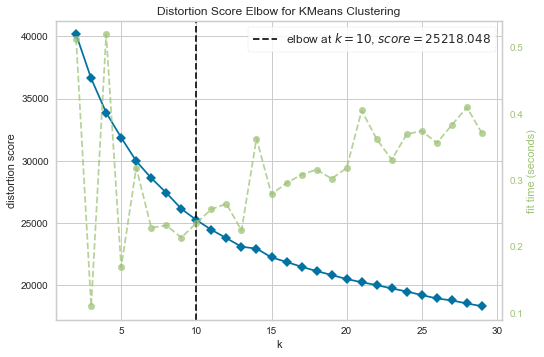

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.graph_objs as go
### the elbow method for whatever data set

# read the data
cluster_df = pd.read_csv("MAIS202data.csv").iloc[:,1:]
# standarize the data
X_std = StandardScaler().fit_transform(cluster_df)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X_std)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

### The original dataset gives us the fact that elbow must be at 10 so the number of the clusters will be equal to seven

In [42]:
### now that we have the number of the clusters we have to create the clusters and visualize them all
kmeans_scale = KMeans(n_clusters=10, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(X_std)
kmeans = KMeans(n_clusters=10)
labels_scale = kmeans_scale.labels_
kmeans.fit(cluster_df)

KMeans(n_clusters=10)

/Users/shahradmz/Desktop/MusicPlaylistGeneratorAIModel/Pywork/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


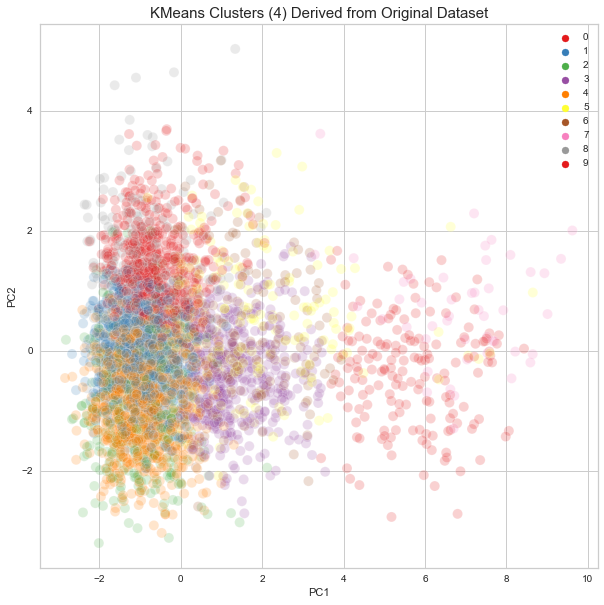

In [43]:
from sklearn.decomposition import PCA

### we have to reduce the number of the features using PCA -> standard scale the data points to be better visualized - first 2D

# Create a PCA instance: pca

pca2 = PCA(n_components=3).fit(X_std)
pca2d = pca2.transform(X_std)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1],
                hue=labels_scale,
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (10) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [54]:

# Then 3D
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()